# Matplotlib

## 简介：
### 特点
* 具有良好的操作系统兼容性和图层接口显示底层兼容性.
* 强大的绘图能力以及灵活控制图形, 同时又不失简洁性.
### 帮助

* [Gallery](https://matplotlib.org/gallery/index.html)

* Google, StackOverflow

### backends

`Matplotlib`有很多`backends`, `backends`负责显示图形, 跟环境与硬件有关, 以适用各种环境如交互式绘图等, 以及图形的保存.

In [1]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_backend())

3.1.0
module://ipykernel.pylab.backend_inline


In [3]:
matplotlib.use('nbAgg')
print(matplotlib.get_backend())

nbAgg


上面的代码必须在`import matplotlib.pyplot as plt`之前导入. 也可以使用`IPython`的magic命令`%matplotlib backend_name`选择`backends`. 

In [4]:
# 进入交互式绘图环境
%matplotlib notebook

## 基本绘图

In [5]:
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


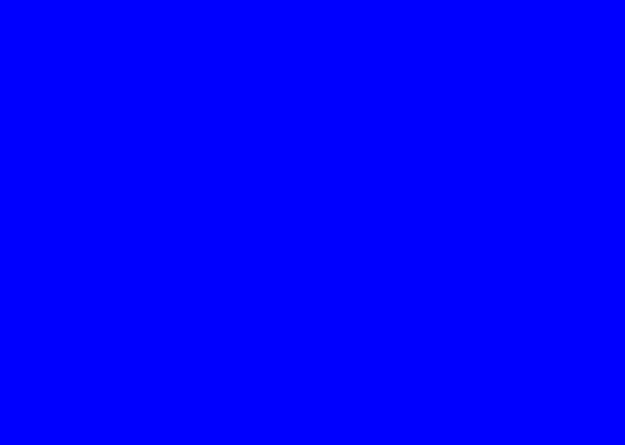

In [6]:
fig = plt.figure(facecolor='b')

注意: 如果在非交互式环境绘图环境中, 需要使用plt.show()才能看见上图.

<IPython.core.display.Javascript object>


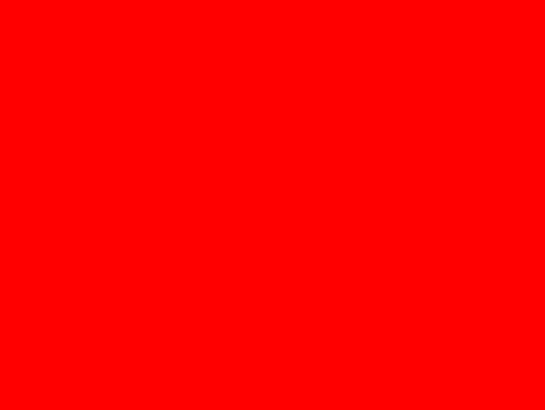

In [8]:
fig = plt.figure(figsize=(4,3),facecolor='r')

<IPython.core.display.Javascript object>


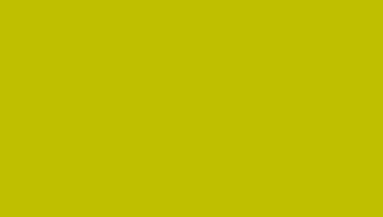

In [10]:
fig = plt.figure(figsize=plt.figaspect(0.618),facecolor='y')

<IPython.core.display.Javascript object>


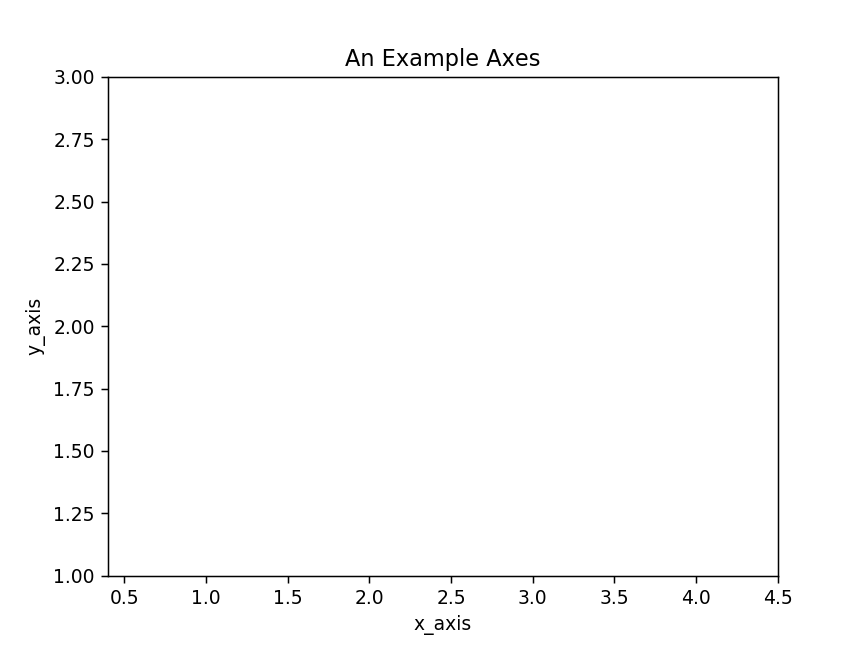

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim=[0.4,4.5],ylim=[1,3],
      xlabel='x_axis',ylabel='y_axis',title='An Example Axes')
plt.show()

`Matplotlib`的很多性质可通过`ax.set_something`实现.

作为对比,

```python
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], 
       title='An Example Axes',
       ylabel='Y-Axis', xlabel='X-Axis')
```
上面代码也可以写成如下形式:

<IPython.core.display.Javascript object>


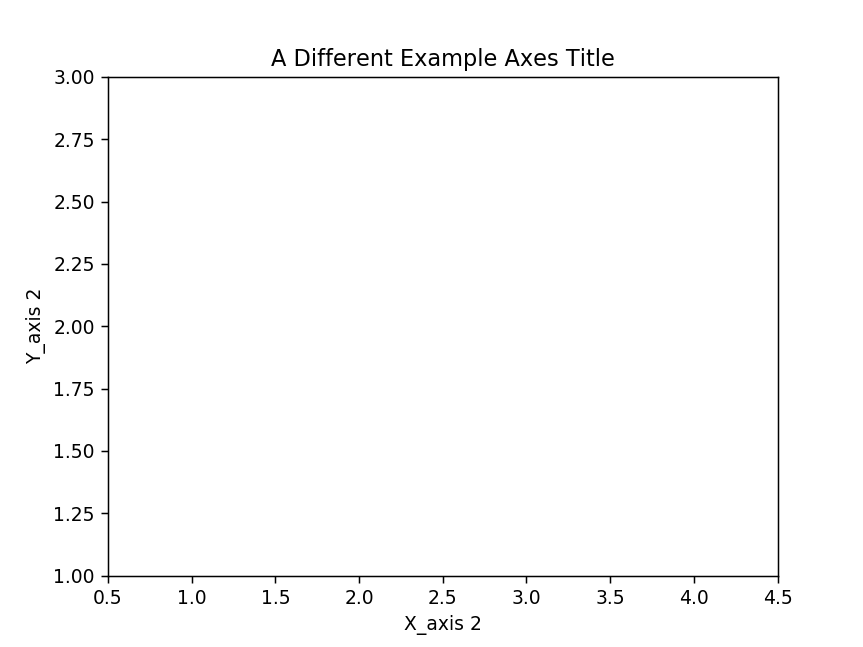

Text(0.5, 1.0, 'A Different Example Axes Title')

In [13]:
fig =plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([0.5,4.5])
ax.set_ylim([1,3])
ax.set_xlabel('X_axis 2')
ax.set_ylabel('Y_axis 2')
ax.set_title('A Different Example Axes Title')

### 绘图初探
大部分绘图操作作用在Axes中, 我们首先介绍两种简单的绘图方法: plot与scatter.

<IPython.core.display.Javascript object>


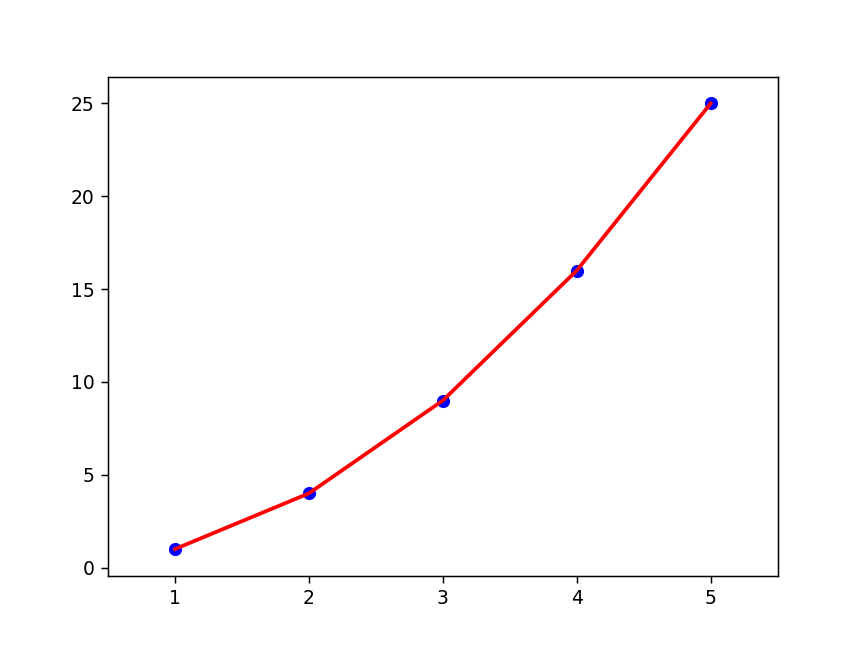

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1,2,3,4,5],[1,4,9,16,25],color='r',linewidth=2)
ax.scatter([1,2,3,4,5],[1,4,9,16,25],color='b',marker='o')
ax.set_xlim([0.5,5.5])
plt.show()

面向对象绘图 vs. Matlab风格绘图
绘图指令:
```python
ax.plot([1, 2, 3, 4], [1, 4, 9, 16], 
        color='r', linewidth=2)
ax.scatter([1, 2, 3, 4], [1, 4, 9, 16], 
#         s = [100, 200, 300, 400],
        color="b", marker='o')
ax.set_xlim(0.5, 4.5)
```

<IPython.core.display.Javascript object>


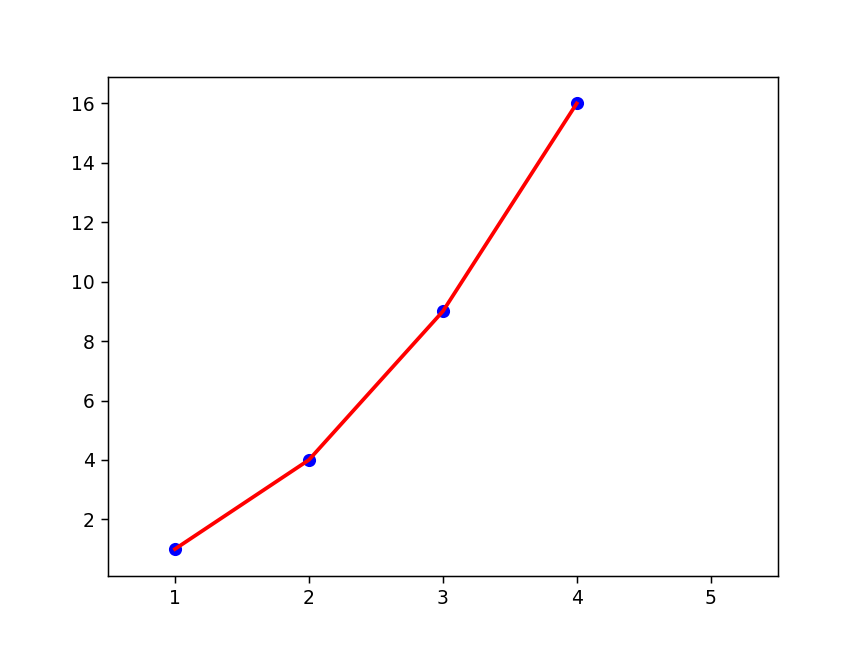

(0.5, 5.5)

In [15]:
plt.figure()
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 
        color='r', linewidth=2)
plt.scatter([1, 2, 3, 4], [1, 4, 9, 16], 
        color="b", marker='o')
plt.xlim(0.5,5.5)

这种绘图方式又快又方便, 适用于快速验证想法(演示 pylab), 但是灵活性不够.
## 多个Axes

<IPython.core.display.Javascript object>


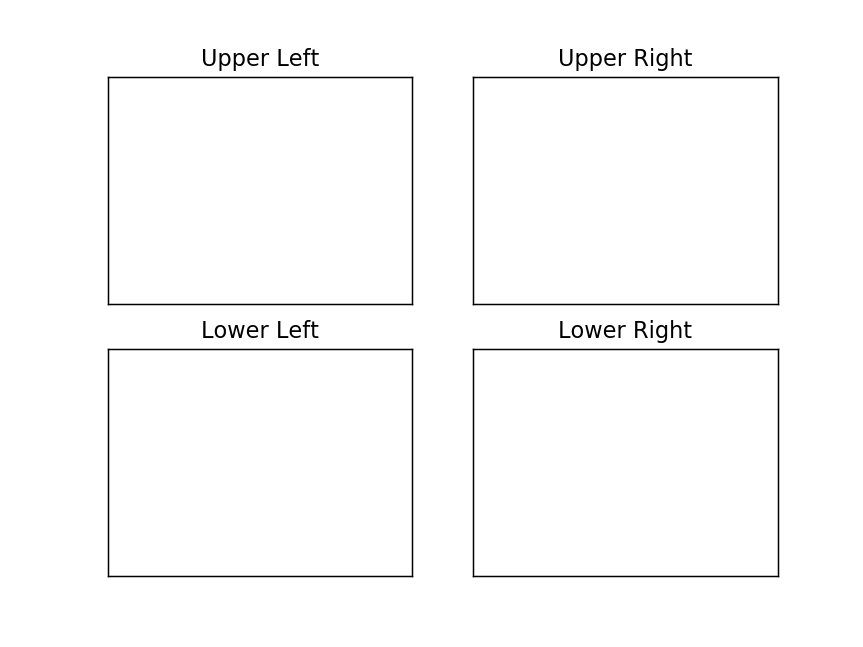

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

for ax in axes.ravel():
    # Remove all xticks and yticks.
    ax.set(xticks=[], yticks=[])

In [23]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BC20D83710>,
      dtype=object)

使用plt.subplots()不带参数的时候, 默认创建只有一个subplot的figure.
```python
fig = plt.figure()
ax = fig.add_subplot(111)
```
可以替换为:
```python
fig, ax = plt.subplots()
```

<IPython.core.display.Javascript object>


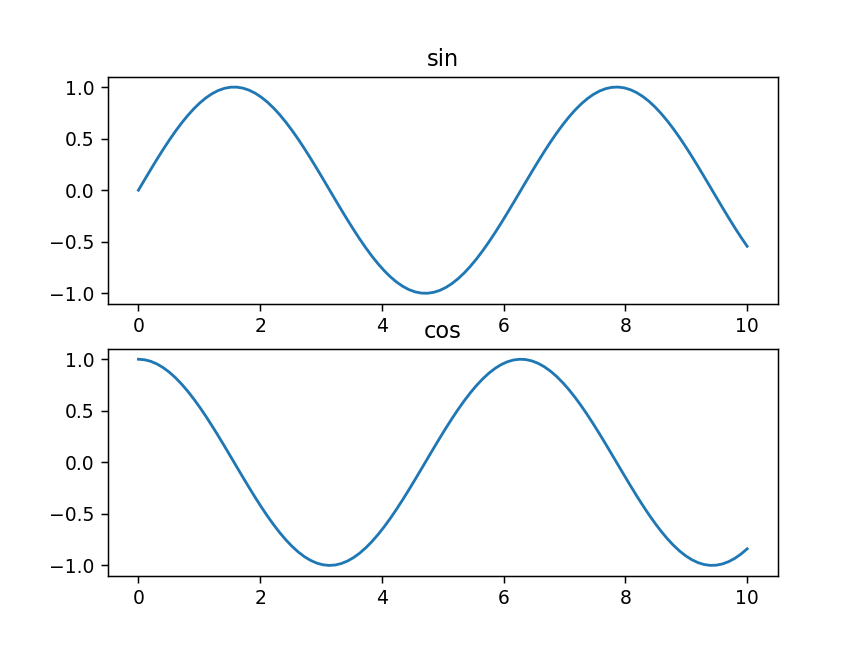

In [24]:
x = np.linspace(0,10,100)
y1, y2 = np.sin(x), np.cos(x)
names = ['sin', 'cos']

fig, axes = plt.subplots(2,1)
axes[0].plot(x,y1)
axes[1].plot(x,y2)

for i,ax in enumerate(axes):
    ax.set(title=names[i])

plt.savefig('example1.png', dpi=600)

<IPython.core.display.Javascript object>


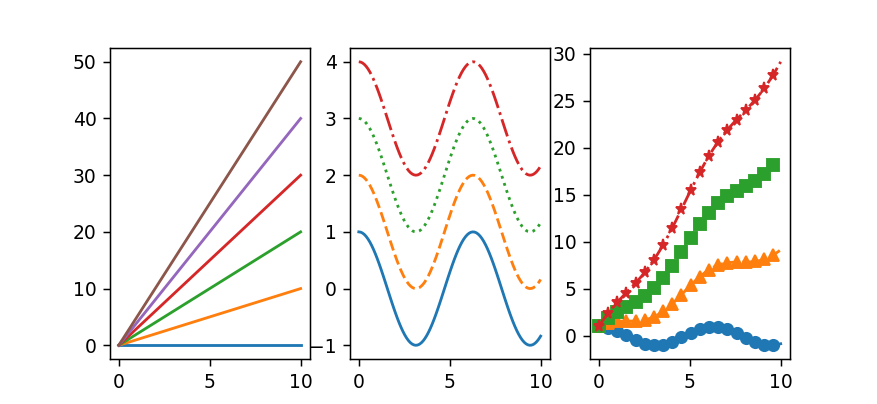

In [28]:
x = np.linspace(0,10,100)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6.5,3))

for i in range(6):
    axes[0].plot(x, i*x)

linestyles = ['-', '--', ':', '-.']
for i,ls in enumerate(linestyles):
    axes[1].plot(x, np.cos(x)+i, linestyle=ls)
    
markers = ['o', '^', 's', '*']
for i,(ls,mk) in enumerate(zip(linestyles, markers)):
    axes[2].plot(x, np.cos(x)+i*x, linestyle=ls, marker=mk, markevery=5)

<IPython.core.display.Javascript object>


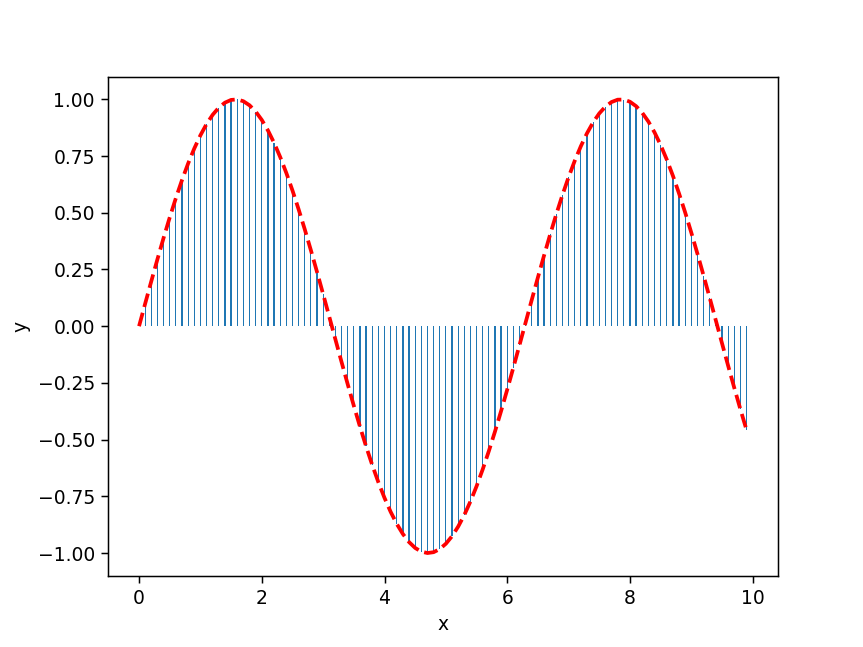

[Text(0, 0.5, 'y'), Text(0.5, 0, 'x')]

In [30]:
fig, ax = plt.subplots()
x = np.arange(0,10,0.1)
y = np.sin(x)
ax.bar(x,y,width=0.02, linewidth=0.2)
ax.plot(x,y,'r--',linewidth=2)
ax.set(xlabel='x', ylabel='y')

<IPython.core.display.Javascript object>


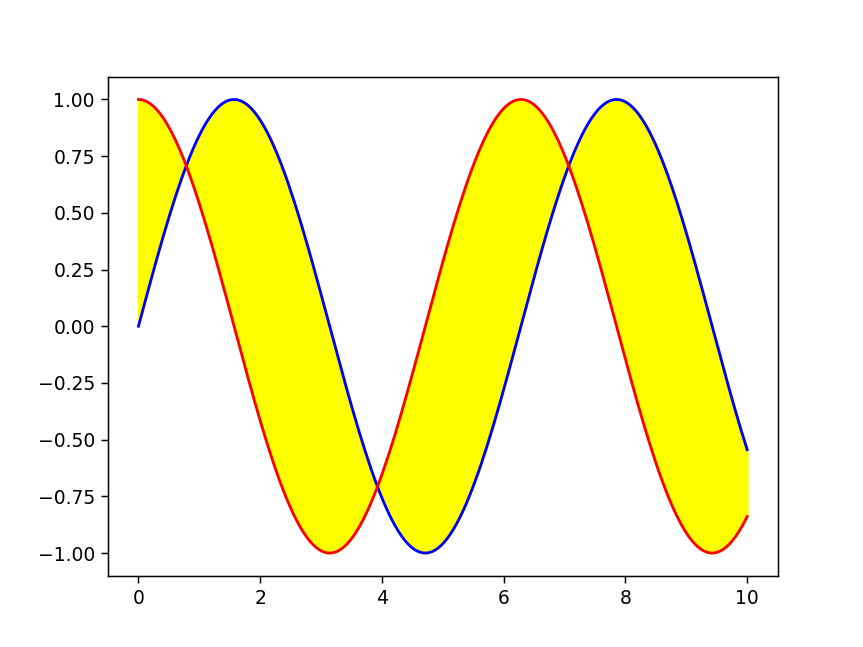

In [31]:
x = np.linspace(0,10,200)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots()
ax.fill_between(x, y1, y2, color='yellow')

ax.plot(x, y1, color='blue')
ax.plot(x, y2, color='red')

plt.show()

### `data` keyword argument

<IPython.core.display.Javascript object>


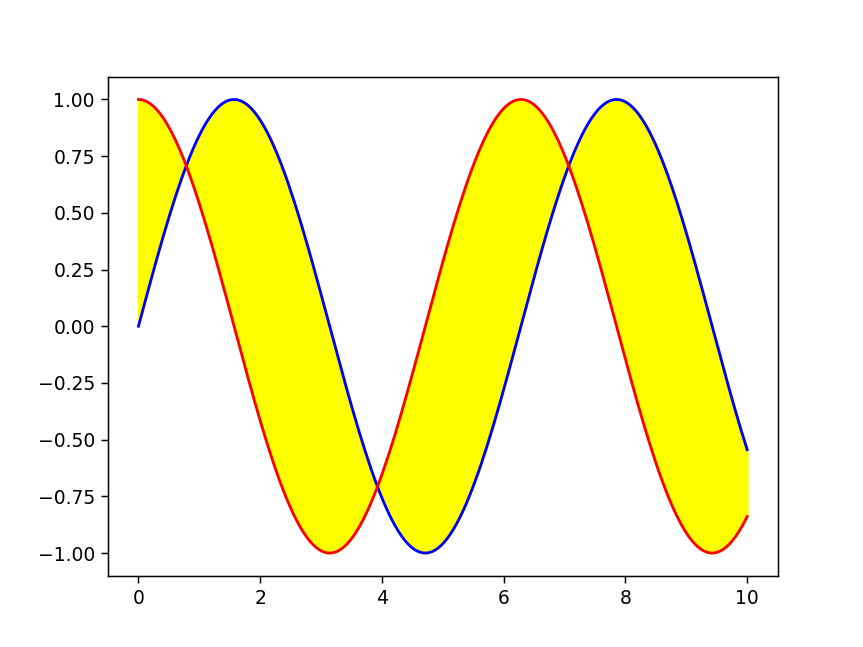

In [32]:
x = np.linspace(0,10,200)
data_obj = {"x":x, "sin":np.sin(x), "cos":np.cos(x)}

fig,ax = plt.subplots()
ax.fill_between("x", "sin", "cos", color='yellow', data=data_obj)
ax.plot("x", "sin", color='blue', data=data_obj)
ax.plot("x", "cos", color='red', data=data_obj)

In [153]:
np.random.seed(1)

# Generate data.
y_raw = np.random.randn(1000).cumsum() + 15
x_raw = np.linspace(0, 24, y_raw.size)

# Get averages of every 100 samples.
x_pos = x_raw.reshape(-1,100).min(axis=1)
y_avg = y_raw.reshape(-1,100).mean(axis=1)
y_err = y_raw.reshape(-1,100).ptp(axis=1)

bar_width = x_pos[1] - x_pos[0]

# Make a made up future prediction with a fake confidence
x_pred = np.linspace(0,30)
y_max_pred = y_avg[0] + y_err[0] + 2.3*x_pred
y_min_pred = y_avg[0] - y_err[0] +1.2*x_pred

# Just so you don't have to guess at the colors...
barcolor, linecolor, fillcolor = 'wheat', 'salmon', 'lightblue'

D:\xuhui\program64\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


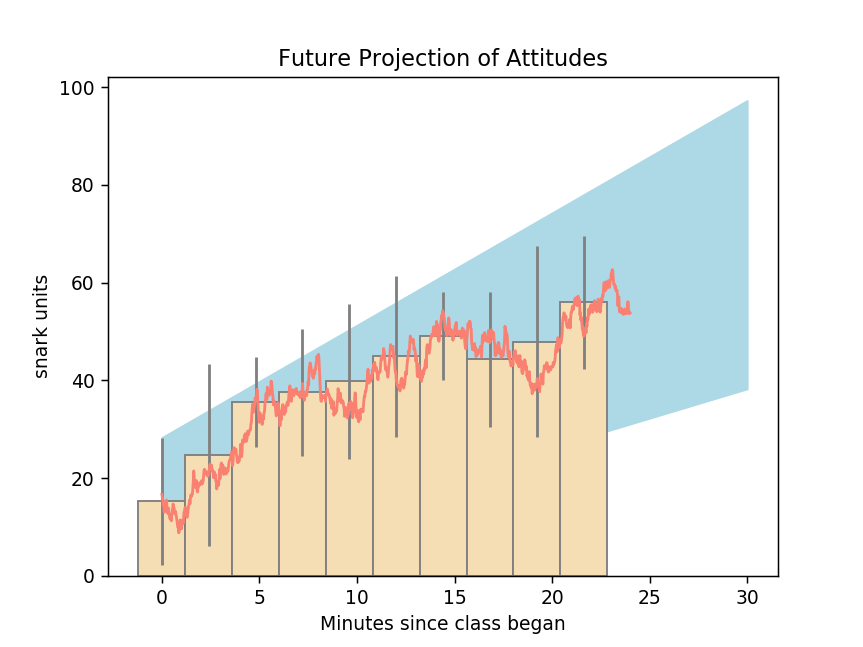

[Text(0, 0.5, 'snark units'),
 Text(0.5, 0, 'Minutes since class began'),
 Text(0.5, 1.0, 'Future Projection of Attitudes')]

In [154]:
fig, ax = plt.subplots()
ax.plot(x_raw, y_raw, color=linecolor)
ax.bar(x_pos, y_avg, width=bar_width, color=barcolor, yerr = y_err, 
      ecolor='gray', edgecolor='gray')
ax.fill_between(x_pred, y_min_pred, y_max_pred,color=fillcolor)
ax.set(title='Future Projection of Attitudes',xlabel='Minutes since class began', 
      ylabel='snark units')


In [64]:
np.linspace(0,10,5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [155]:
ax.bar?

In [63]:
np.linspace(0,10,5).cumsum() #累加

array([ 0. ,  2.5,  7.5, 15. , 25. ])

## 绘图属性
### 颜色

### 颜色名字

* b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

### 十六进制
### RGB

### 标记(Markers)

marker     |  description  | marker    |  description    | marker   |  description  | marker    |  description  
:----------|:--------------|:----------|:----------------|:---------|:--------------|:----------|:--------------
"."        |  point        | "+"       |  plus           | ","      |  pixel        | "x"       |  cross
"o"        |  circle       | "D"       |  diamond        | "d"      |  thin_diamond |           |
"8"        |  octagon      | "s"       |  square         | "p"      |  pentagon     | "\*"      |  star
"&#124;"   |  vertical line| "\_"      | horizontal line |  "h"     |  hexagon1     | "H"       |  hexagon2
0          |  tickleft     | 4         |  caretleft      | "<"      | triangle_left | "3"       |  tri_left
1          |  tickright    | 5         |  caretright     | ">"      | triangle_right| "4"       |  tri_right
2          |  tickup       | 6         |  caretup        | "^"      | triangle_up   | "2"       |  tri_up
3          |  tickdown     | 7         |  caretdown      | "v"      | triangle_down | "1"       |  tri_down
"None"     |  nothing      | `None`    |  default        | " "      |  nothing      | ""        |  nothing

<IPython.core.display.Javascript object>


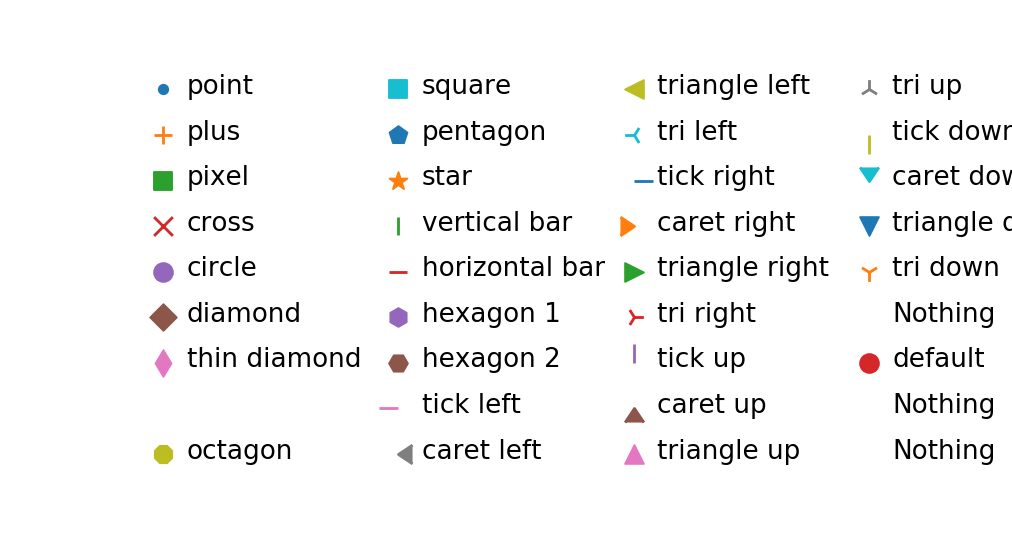

In [77]:
xs, ys = np.mgrid[0:4, 9:0:-1]
markers = [".", "+", ",", "x", "o", "D", "d", "", "8", "s", "p", "*", "|", "_", "h", "H", 0, 4, "<", "3",
           1, 5, ">", "4", 2, 6, "^", "2", 3, 7, "v", "1", "None", None, " ", ""]
descripts = ["point", "plus", "pixel", "cross", "circle", "diamond", "thin diamond", "",
             "octagon", "square", "pentagon", "star", "vertical bar", "horizontal bar", "hexagon 1", "hexagon 2",
             "tick left", "caret left", "triangle left", "tri left", "tick right", "caret right", "triangle right", "tri right",
             "tick up", "caret up", "triangle up", "tri up", "tick down", "caret down", "triangle down", "tri down",
             "Nothing", "default", "Nothing", "Nothing"]
fig, ax = plt.subplots(1, 1, figsize=(7.5, 4))
for x, y, m, d in zip(xs.flat, ys.flat, markers, descripts):
    ax.scatter(x, y, marker=m, s=100)
    ax.text(x + 0.1, y - 0.1, d, size=14)
ax.set_axis_off()

In [70]:
np.mgrid?

### 线条样式

linestyle          | description
-------------------|------------------------------
'-'                | solid
'--'               | dashed
'-.'               | dashdot
':'                | dotted
'None'             | draw nothing
' '                | draw nothing
''                 | draw nothing

<IPython.core.display.Javascript object>


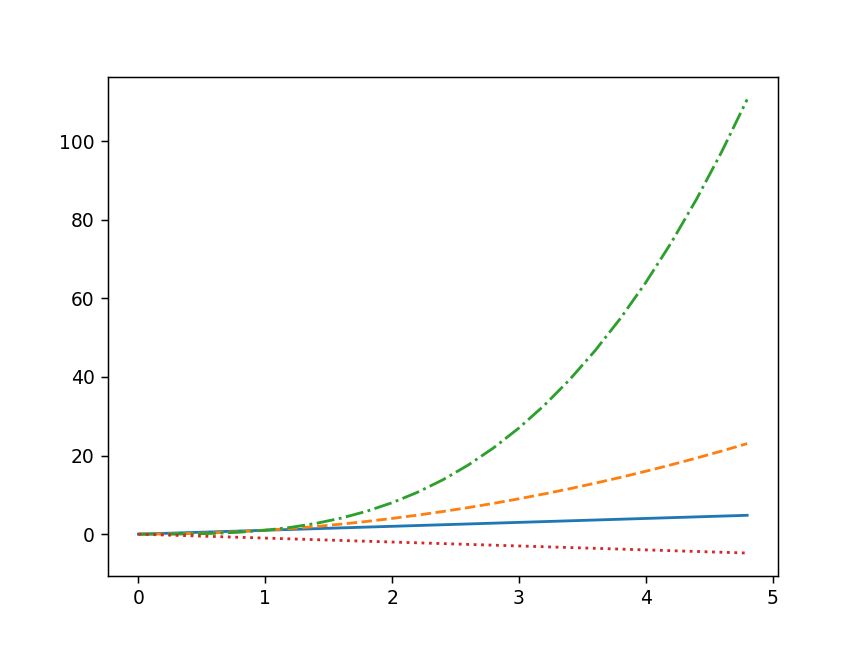

In [78]:
fig, ax = plt.subplots()
t = np.arange(0,5,0.2)
ax.plot(t,t,'-',t,t**2,'--',t,t**3,'-.',t,-t,':')

<IPython.core.display.Javascript object>


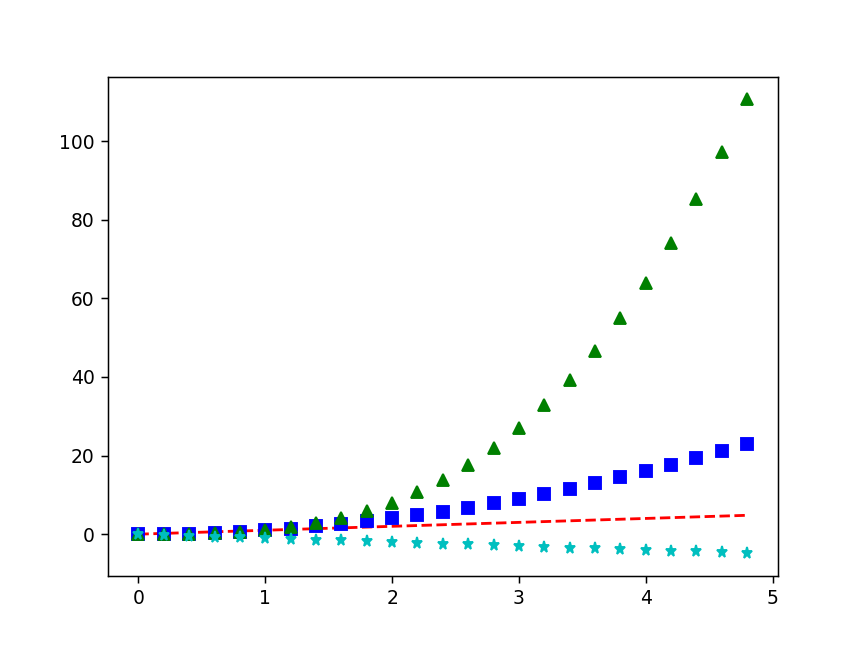

In [79]:
fig, ax = plt.subplots()
t = np.arange(0,5,0.2)
ax.plot(t,t,'r--',t,t**2,'bs',t,t**3,'g^',t,-t,'c*')

<IPython.core.display.Javascript object>


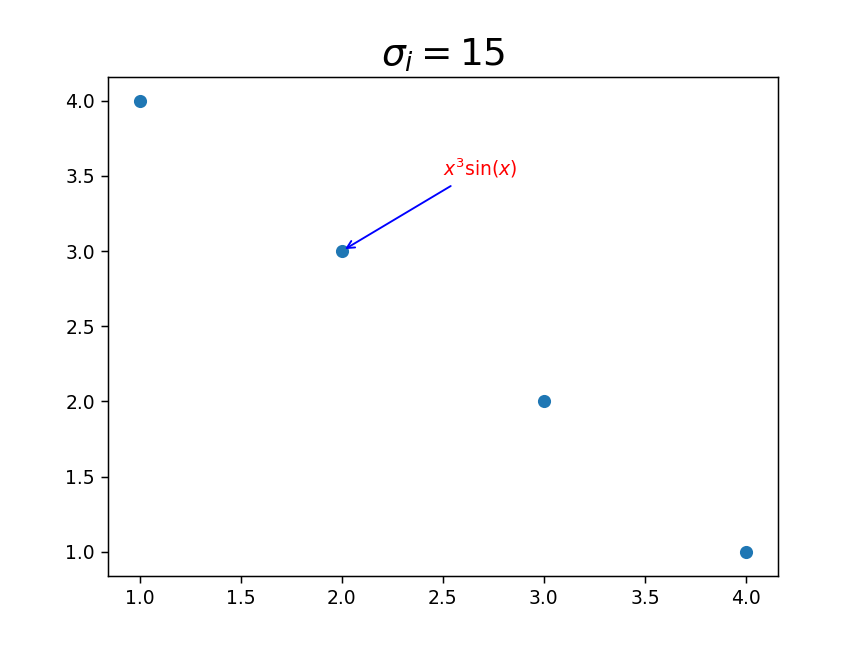

Text(2.5, 3.5, '$x^3\\sin(x)$')

In [86]:
fig, ax = plt.subplots()
ax.scatter([1,2,3,4],[4, 3, 2, 1])
ax.set_title(r'$\sigma_i=15$', fontsize=20)
ax.annotate('$x^3\sin(x)$', (2.0,3.0), xytext=(2.5,3.5), 
            arrowprops={"arrowstyle":"->", "color":"blue"}, color='r')

### 使用`matplotlibrc`

In [87]:
print(matplotlib.matplotlib_fname())

D:\xuhui\program64\Anaconda\envs\pytorch\lib\site-packages\matplotlib\mpl-data\matplotlibrc


## Limits, Legends, and Layouts

<IPython.core.display.Javascript object>


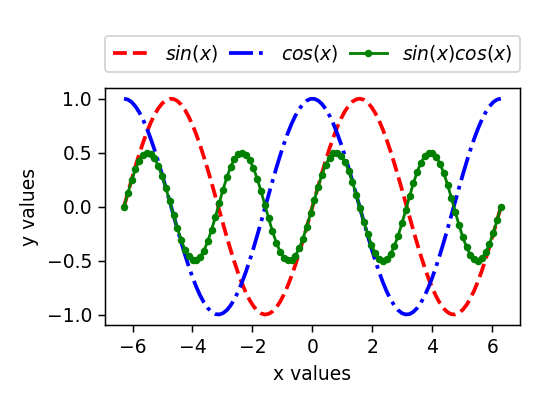

D:\xuhui\program64\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'low left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


In [105]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x, np.sin(x), 'r--', lw=2, label=r'$sin(x)$')
ax.plot(x, np.cos(x), color='b', linestyle='-.', 
       linewidth=2, label=r'$cos(x)$')
ax.plot(x, np.sin(x)*np.cos(x), 'go-', ms=3, label=r'$sin(x)cos(x)$')

ax.set_xlabel('x values')
ax.set_ylabel('y values')

ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2),loc='low left', 
              mode='expand', borderaxespad=0, ncol=3)
plt.tight_layout() #使图形紧凑



plt.show()

<IPython.core.display.Javascript object>


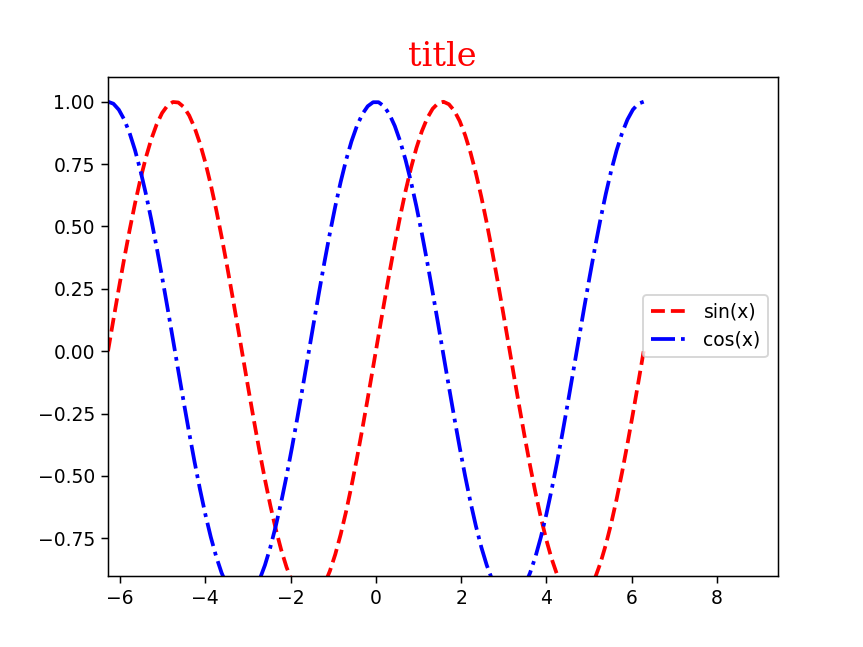

In [108]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), "r--", lw=2, label="sin(x)")
ax.plot(x, np.cos(x), color="b", linestyle="-.", 
        linewidth=2, label="cos(x)")
ax.set_title('title',fontsize=18,fontname='serif',color='red')
ax.set_xlim([-2*np.pi, 2*np.pi*1.5])
ax.set_ylim([-0.9,1.1])

ax.legend(loc='center right')

<IPython.core.display.Javascript object>


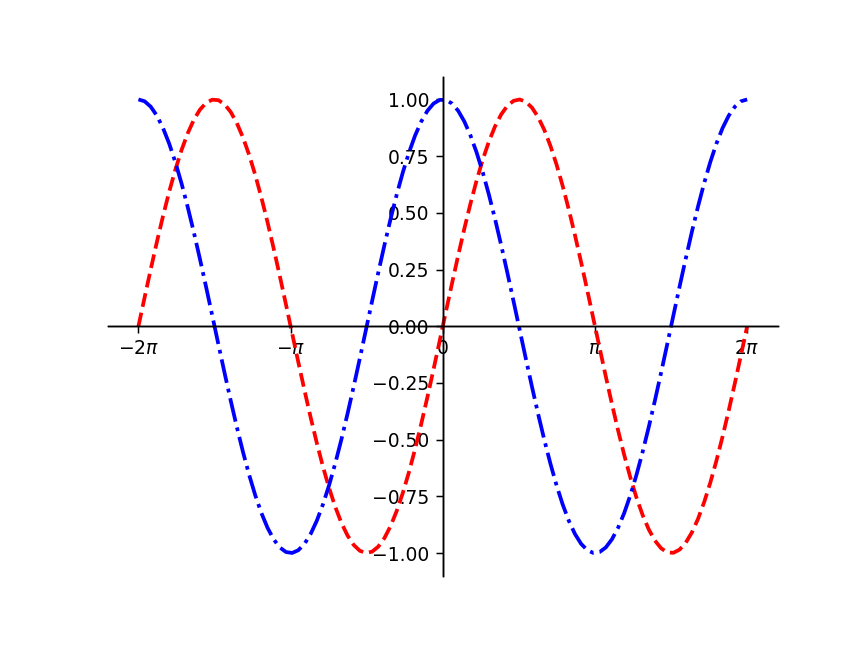

In [111]:
import matplotlib as mpl
x = np.linspace(-2*np.pi, 2*np.pi, 100)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), "r--", lw=2, label="sin(x)")
ax.plot(x, np.cos(x), color="b", linestyle="-.", 
        linewidth=2, label="cos(x)")

# set major tick.
ax.set_xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi])
ax.set_xticklabels(['$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$'])

# set minor tick.
mpl.ticker.FixedLocator([-3*np.pi/2, -np.pi/2, 0, np.pi/2, 3*np.pi/2])

# ax.grid(ls=":")
ax.spines['right'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.spines['top'].set_position(('data',0))
ax.spines['bottom'].set_position(('data',0))

<IPython.core.display.Javascript object>


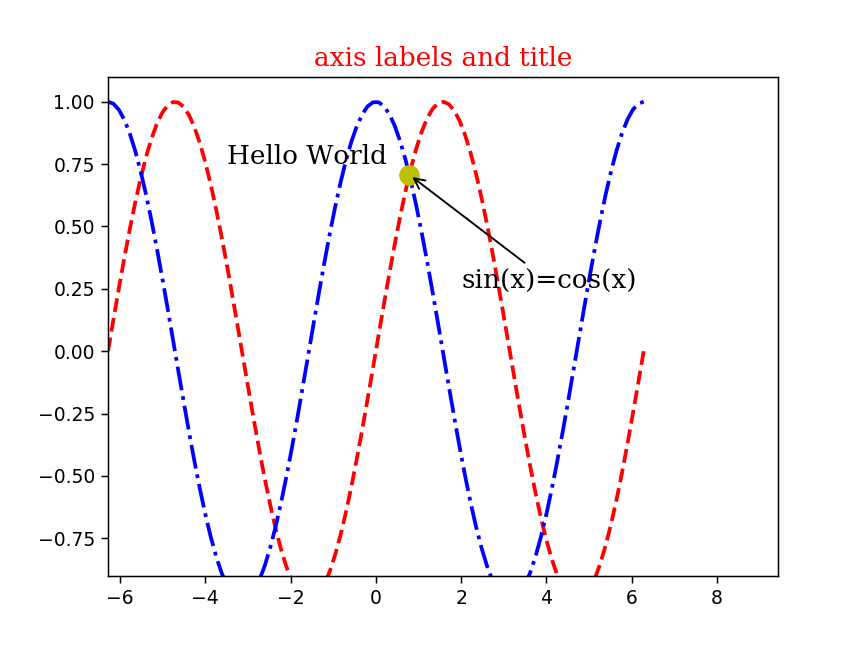

(-0.9, 1.1)

In [113]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), "r--", lw=2, label="sin(x)")
ax.plot(x, np.cos(x), color="b", linestyle="-.", 
        linewidth=2, label="cos(x)")

ax.plot(0.78539816, 0.70710678,'yo', ms=10)
ax.text(-3.5, 0.75, 'Hello World', fontsize=14, family='serif')
ax.annotate('sin(x)=cos(x)', fontsize=14, family='serif', 
            xy=(0.78539816, 0.70710678), xytext=(2.0, 0.25), arrowprops=dict(arrowstyle='->'))

ax.set_title('axis labels and title', fontsize=14, fontname='serif', color='red')

ax.set_xlim([-2*np.pi, 2*np.pi*1.5])
ax.set_ylim([-0.9, 1.1])

<IPython.core.display.Javascript object>


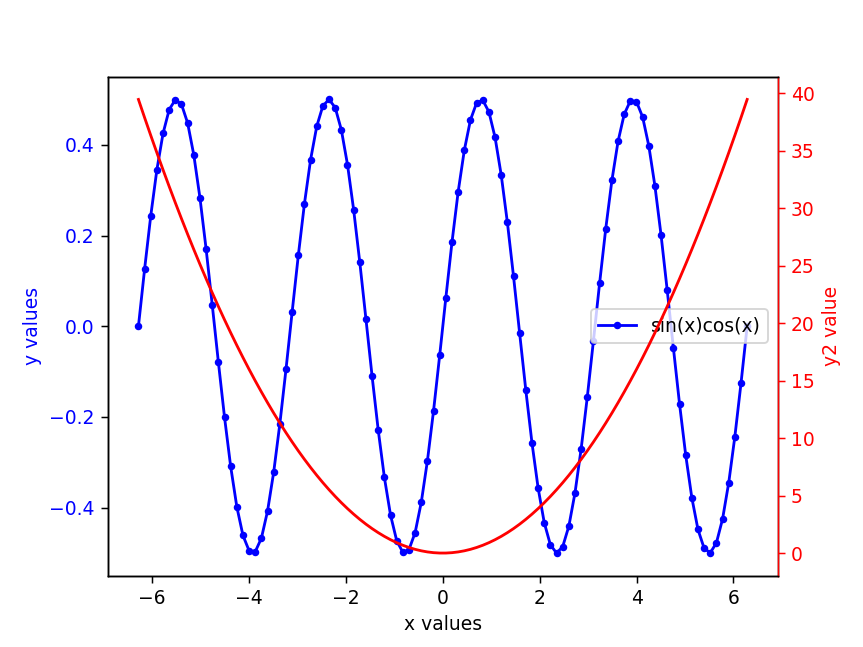

In [117]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
fig, ax = plt.subplots()

ax.plot(x, np.cos(x)*np.sin(x), "bo-", ms=3, label="sin(x)cos(x)")
for label in ax.get_yticklabels():
    label.set_color('blue')
ax.set_xlabel('x values')
ax.set_ylabel('y values', color='blue')

ax2 = ax.twinx()
p2, = ax2.plot(x, x**2, 'r')
for label in ax2.get_yticklabels():
    label.set_color('red')
ax2.set_ylabel('y2 value', color=p2.get_color())
ax2.spines['right'].set_color(p2.get_color())

ax2.tick_params(axis='y',colors=p2.get_color())
ax.legend()

<IPython.core.display.Javascript object>


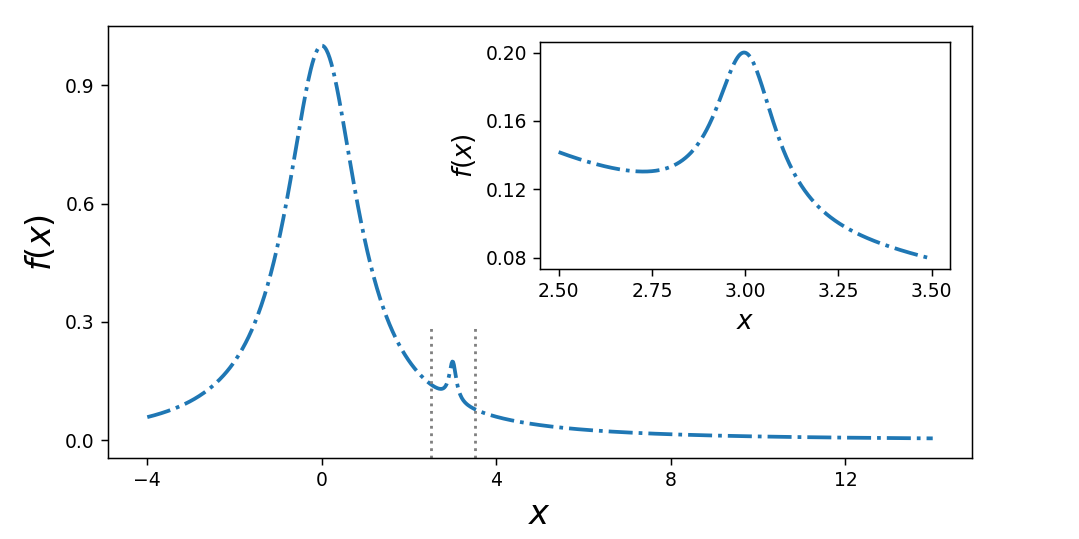

In [121]:
fig = plt.figure(figsize=(8,4))

def f(x):
    return 1/(1+x**2) + 0.1 / (1 + ((3-x)/0.1)**2)

def plot_and_format_axes(ax, x, f, fontsize):
    ax.plot(x, f(x), '-.',linewidth=2)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
    ax.set_xlabel(r'$x$', fontsize=fontsize)
    ax.set_ylabel(r'$f(x)$', fontsize=fontsize)
    
# main graph
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8]) # xmin, ymin, xwidth, ywidth
x = np.linspace(-4, 14, 1000)
plot_and_format_axes(ax, x, f, 18)

# inset
x0, x1 = 2.5, 3.5
ax.axvline(x0, ymax=0.3, color='grey', linestyle=":")
ax.axvline(x1, ymax=0.3, color='gray', linestyle=':')

ax = fig.add_axes([0.5, 0.5, 0.38, 0.42])
x = np.linspace(x0, x1, 1000)
plot_and_format_axes(ax, x, f, 14)

## 三维绘图

<IPython.core.display.Javascript object>


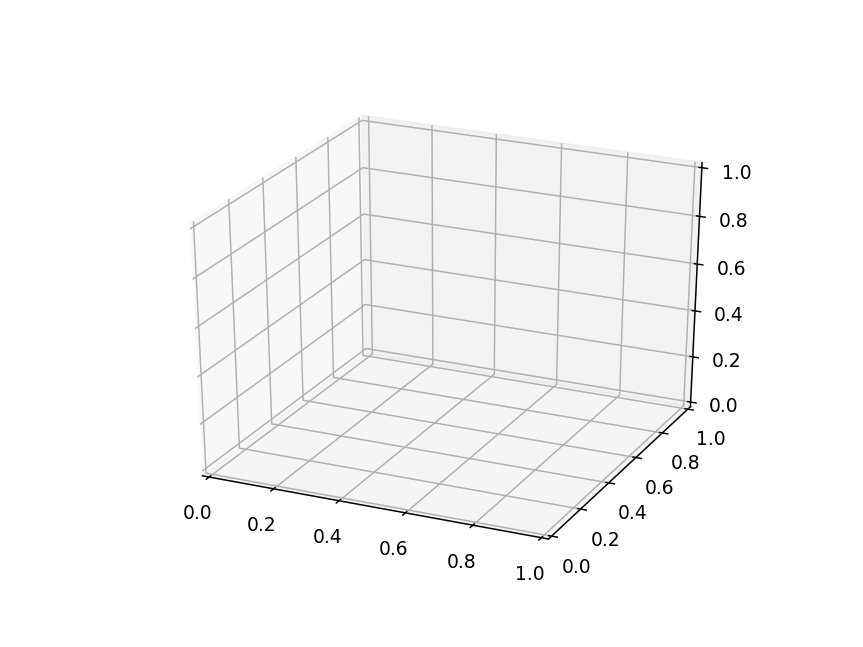

In [128]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.show()

D:\xuhui\program64\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


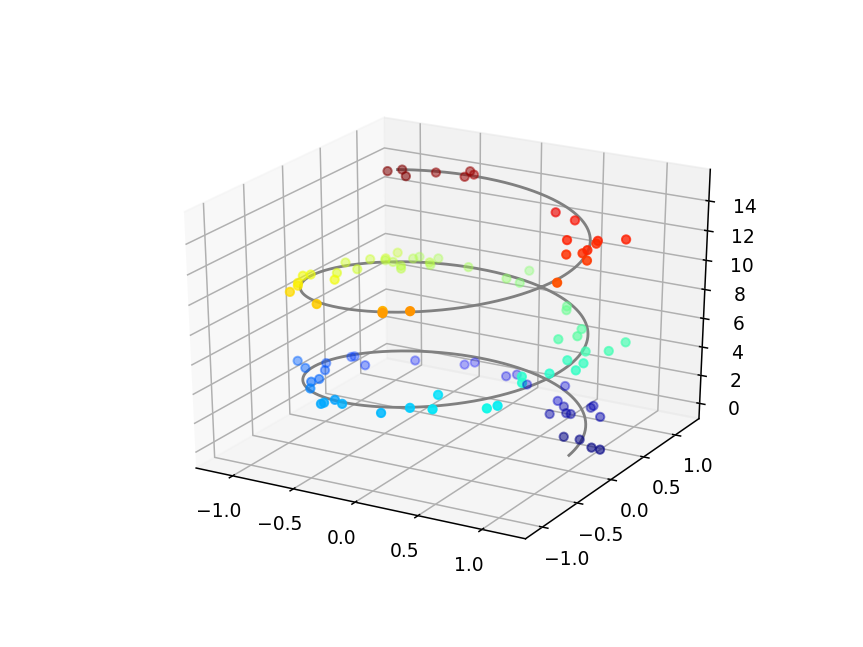

In [137]:
fig = plt.figure()
ax = plt.axes(projection='3d')

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, color='gray')

z_points = 15 * np.random.random(100)
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='jet')

D:\xuhui\program64\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


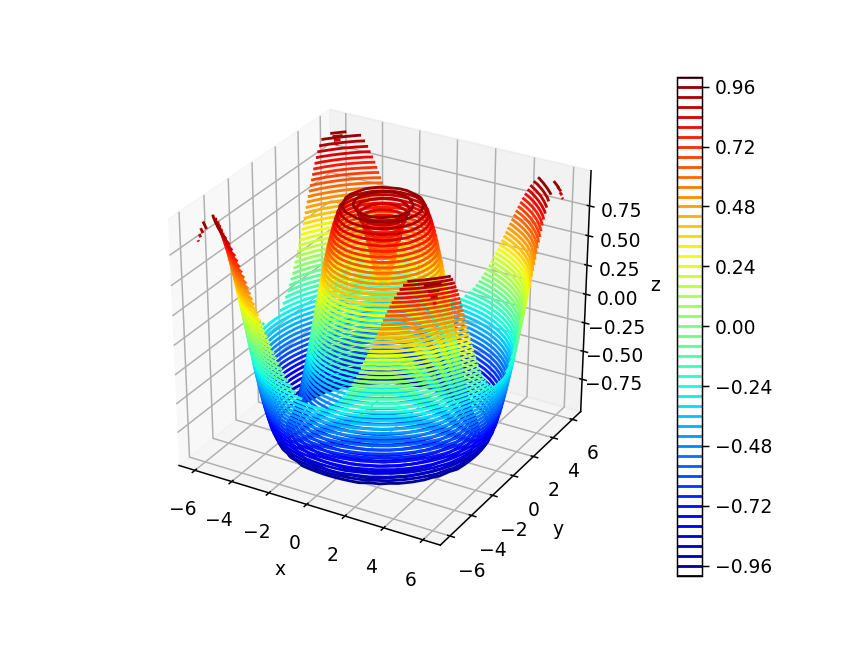

In [143]:
def z_function(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

x = np.linspace(-6,6,30)
y = np.linspace(-6,6,30)

X, Y = np.meshgrid(x,y)
Z = z_function(X,Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
p0 = ax.contour3D(X, Y, Z, levels=50, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.colorbar(p0)

D:\xuhui\program64\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


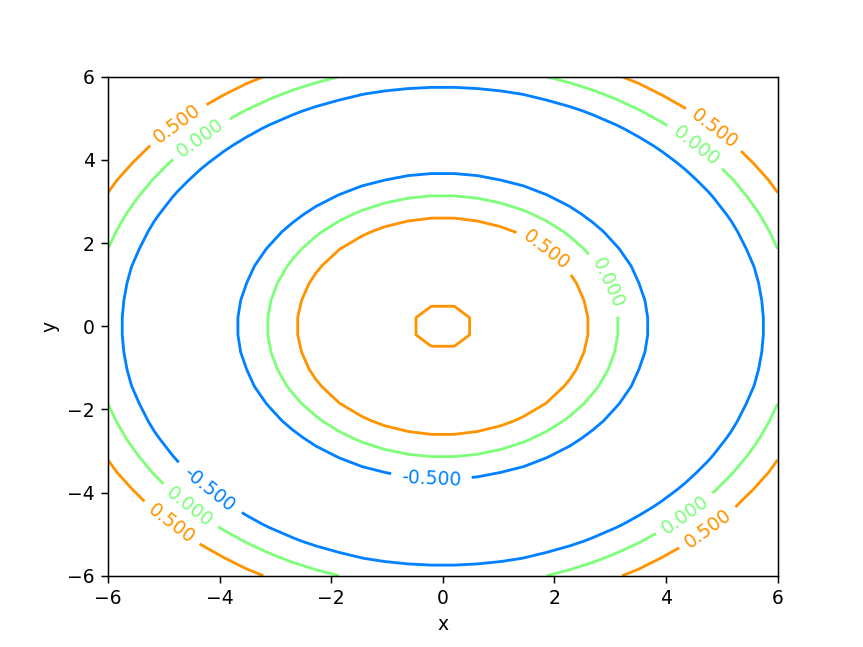

Text(0, 0.5, 'y')

In [146]:
def z_function(x,y):
    return np.sin(np.sqrt(x**2 + y**2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

fig, ax = plt.subplots()
p0 = ax.contour(X, Y, Z, levels=3, cmap='jet')
plt.clabel(p0, inline=True, fontsize=10) # 标注等高线标签
ax.set_xlabel('x')
ax.set_ylabel('y')

D:\xuhui\program64\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


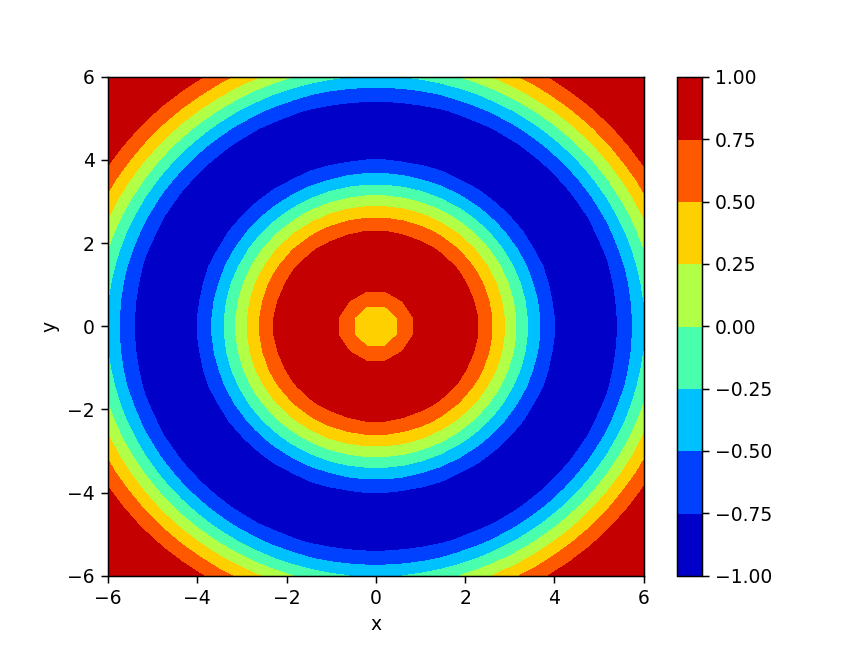

In [148]:
def z_function(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

fig, ax = plt.subplots()
p0 = ax.contourf(X, Y, Z, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p0)

D:\xuhui\program64\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


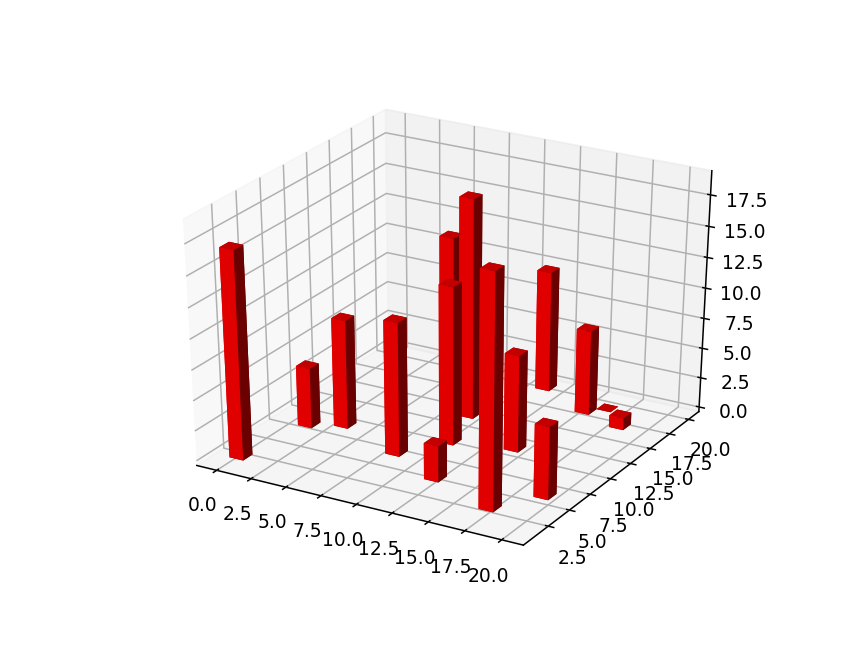

In [150]:
import random

fig = plt.figure()
ax = plt.axes(projection='3d')

num_bars = 15
x_pos = random.sample(range(20), num_bars)
y_pos = random.sample(range(20), num_bars)
z_pos = [0]*num_bars
x_size = np.ones(num_bars)
y_size = np.ones(num_bars)
z_size = random.sample(range(20), num_bars)

ax.bar3d(x_pos, y_pos, z_pos, x_size, y_size, z_size, color='red')
plt.show()

In [151]:
ax.bar3d?

# 动画 Animation

D:\xuhui\program64\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


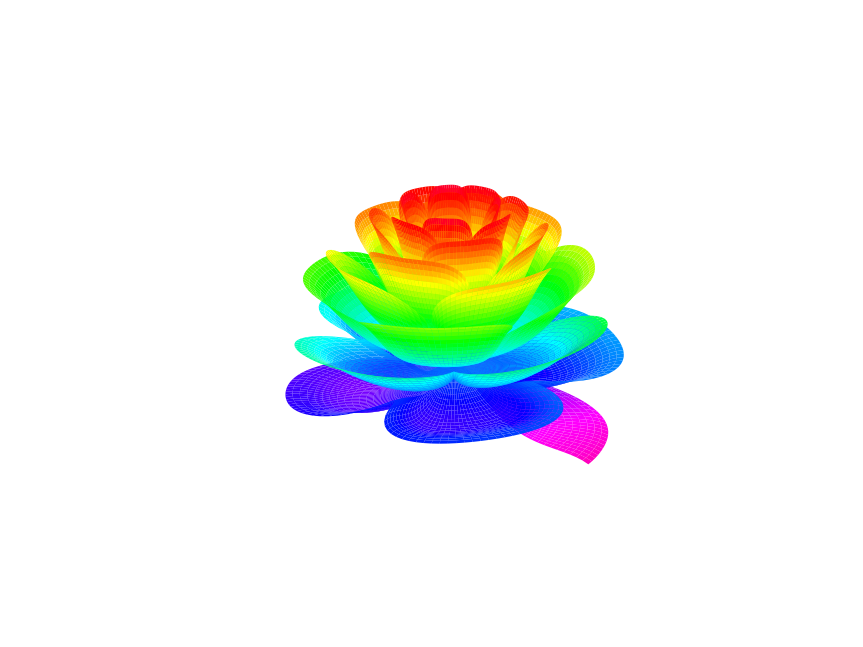

In [162]:
from matplotlib import cm
fig = plt.figure()
ax = plt.gca(projection='3d')
ax.set_axis_off()
x = np.array(range(25))/24.0
t = np.arange(0, 575.5, 0.5) / 575 * 17 * np.pi -2*np.pi
X, T = np.meshgrid(x,t)
p = (np.pi/2) * np.exp(-T / (8*np.pi))
u = 1 - (1 - np.mod(3.6*T, 2*np.pi)/np.pi) ** 4 / 2
y = 2 * (X**2-X) ** 2 * np.sin(p)
r = u * (X*np.sin(p) + y* np.cos(p))

surf = ax.plot_surface(r * np.cos(T), r*np.sin(T),
                      u*(x*np.cos(p)-y*np.sin(p)), rstride=1, cstride=1,
                       cmap=cm.gist_rainbow_r, linewidth=0, antialiased=True)

plt.show()
plt.savefig('flower.png', dpi=600)

D:\xuhui\program64\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


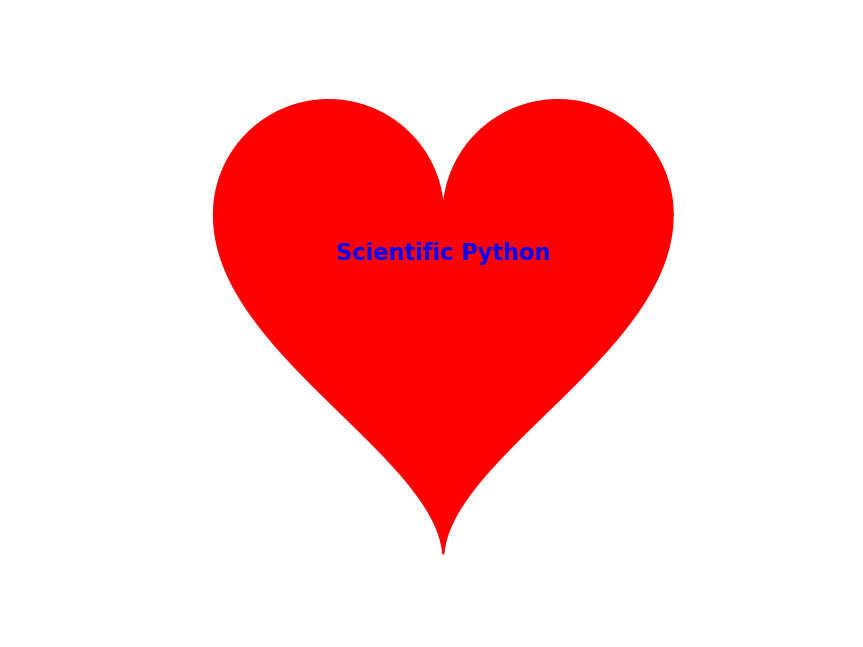

In [161]:
x = np.linspace(-2,2,1000)
y1 = np.sqrt(1-(abs(x)-1)**2)
y2 = -3*np.sqrt(1-(abs(x)/2)**0.5)
fig, ax = plt.subplots()
ax.fill_between(x, y1, color='red')
ax.fill_between(x, y2, color='red')

ax.set_xlim([-2.5, 2.5])
ax.text(0, -0.4, 'Scientific Python', fontsize=12, fontweight='bold',
           color='blue', horizontalalignment='center')
ax.axis('equal')
ax.set_axis_off()
# ax.set_xticks([])
# ax.set_yticks([])

# ax.spines['right'].set_color("white")
# ax.spines['top'].set_color("white")

# ax.spines["bottom"].set_color("white")
# ax.spines["left"].set_color("white")
